# Plotting Characteristic Curve of Word Lengths with matplotlib

In this notebook, it will go over how to acquire a corpus from gutenberg. Afterwards using nltk analyze the text for characteristic curve of words. Finally using matplotlib plot this information.

## Libraries and Resources used

-  Python 3
-  nltk
-  urllib3
-  matplotlib

## Note:

For installation of the nessesary resources and libraries refer to their respective home page for installation steps for your operation system.


Written in October 2017

### Importing all the required Libraries

In [1]:
import urllib3
import nltk
import matplotlib.pyplot as plt
import os

# make sure that graphs are embedded into our notebook output
%matplotlib inline

### Loading a text from gutenburg and saving it in a txt file

In this example we will be looking at the text of Moby Dick by Herman Melville

In [2]:
# Using urllib.request we can fetch the text
webUrl = "http://www.gutenberg.org/cache/epub/2147/pg2147.txt"

# Save the text from the webpage into a variable
http_pool = urllib3.connection_from_url(webUrl)
storyString = http_pool.urlopen('GET',webUrl)

# Save the data into a text file
with open("MobyDick.txt", "w") as f:
    # Write all the content into the file
    f.write(storyString.data.decode('utf-8'))

### Using nltk to clean corpus and save word length

Although it wasn't vital that we saved the URL content into another text file (since the original URL links to a text file). It allows you to apply other code/programs to the text file for cleaning. In this example however we will not be doing any additional cleaning to the text file. In this case we will save all cleaning into the variable "mobyDictText" and the word length in "mobyDickTextWordLength". 

In [3]:
# Read the text file
with open("MobyDick.txt", "r") as f:
    mobyDictText = f.read()

# Lowercase all the words (to ensure "Sure" and "sure" are matched together)
# Also word_tokenize splits each element in individual tokens
mobyDictText = nltk.word_tokenize(mobyDictText.lower())

# Remove any words that isn't a word
mobyDictText = [word for word in mobyDictText if word[0].isalpha()]

# Iterate through each word and save its length
mobyDictTextWordLength = [len(w) for w in mobyDictText]

### Varification

Before we move on. Lets just check to ensure that the code is working as intended

In [4]:
# Print the first 5 words and their length
print("First five words: ", mobyDictText[:5])
print("First five word lengths: ", mobyDictTextWordLength[:5])

First five words:  ['gutenberg', 'the', 'works', 'of', 'edgar']
First five word lengths:  [9, 3, 5, 2, 5]


### Graphing word length

Now that we have all the word lengths it is time to graph it.

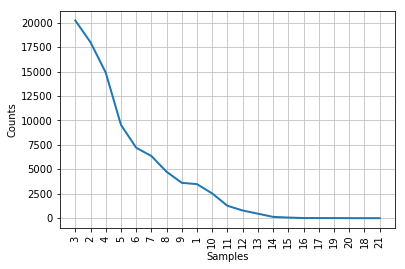

In [5]:
nltk.FreqDist(mobyDictTextWordLength).plot()

Note that the graph itself does not being a 0 on the x-axis. This is because the graph is sorted by count (y-axis). Meaning the word length with the highest amount is in the first position on the x-axis. To fix this we can sort our initial word length list by word length. 

In [6]:
# Sort the list from smallest to greatest word length
mobyDictTextWordLength = list(sorted(nltk.FreqDist(mobyDictTextWordLength).items()))

# Print result to see
print(mobyDictTextWordLength) 

[(1, 3481), (2, 17996), (3, 20223), (4, 14896), (5, 9547), (6, 7208), (7, 6357), (8, 4745), (9, 3617), (10, 2524), (11, 1268), (12, 784), (13, 460), (14, 132), (15, 63), (16, 13), (17, 10), (18, 2), (19, 10), (20, 4), (21, 1)]


### Plotting the new word length list

Now that we have ordered the list we can now graph it in a more useful way.

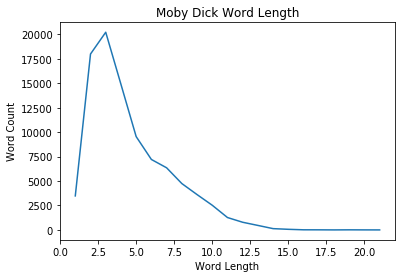

In [7]:
# Grabs all the word lengths (0 -> 21)
mobyDictWordLength = [f[0] for f in mobyDictTextWordLength]

# Grabs all the values for all the word length that is assoicated with them
mobyDictWordLengthValues = [f[1] for f in mobyDictTextWordLength]

# Create a plot of the values
plt.plot(mobyDictWordLength, mobyDictWordLengthValues)

# Set labels and values
plt.xlabel('Word Length')
plt.ylabel('Word Count')
plt.title("Moby Dick Word Length")

### Plotting with other graph

Not only can we have this type of graph we can also insert this information into other graphs. For example a historgram or bar graph.

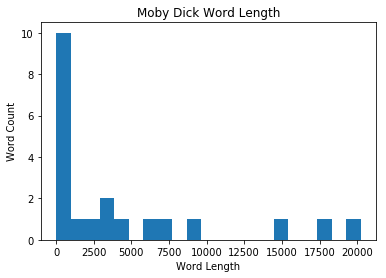

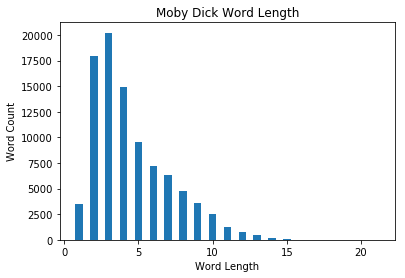

In [8]:
# Create a histogram 
# Bins determines how many sections and we want as many sections as there are different word length
plt.hist(mobyDictWordLengthValues, bins=len(mobyDictWordLengthValues))
plt.xlabel('Word Length')
plt.ylabel('Word Count')
plt.title("Moby Dick Word Length")
plt.show() # Show the plot.


# Create a bar graph
plt.bar(mobyDictWordLength,mobyDictWordLengthValues, width=0.5,align='center')
plt.xlabel('Word Length')
plt.ylabel('Word Count')
plt.title("Moby Dick Word Length")

# Show bar graph
plt.show() 

### Conclusion

Now you are to use urllib3 to go to a URL to get the content. Followed by the ability to save the text into a save file which you can then load and clean however you wish. Finally using nltk and matplotlib able to map the word length of a the text as different type of graphs.

This notebook was created in part from resources found at :
https://github.com/sgsinclair/alta/blob/6dd71da5377217cdee85efba384c8bf66936ab82/ipynb/GettingGraphical.ipynb